In [1]:
#  Let’s get the latest NLP tools!
!pip install -q transformers rich matplotlib seaborn


In [2]:
import tensorflow as tf
import os
import tarfile

# 🗃️ Download and extract IMDB dataset (Stanford)
dataset_path = tf.keras.utils.get_file(
    "aclImdb_v1.tar.gz",
    "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)

extract_folder = os.path.join(os.path.dirname(dataset_path), "aclImdb_v1_extracted")
if not os.path.exists(extract_folder):
    with tarfile.open(dataset_path, "r:gz") as tar:
        tar.extractall(os.path.dirname(dataset_path))
IMDB_DATADIR = os.path.join(extract_folder, "aclImdb")

print(f"✅ Data available at: {IMDB_DATADIR}")


84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
✅ Data available at: /root/.keras/datasets/aclImdb_v1_extracted/aclImdb


In [3]:
from tqdm.auto import tqdm
import glob

def load_imdb_data(data_dir, subset):
    texts, labels = [], []
    for label in ['pos', 'neg']:
        folder = os.path.join(data_dir, subset, label)
        files = glob.glob(os.path.join(folder, '*.txt'))
        for filename in tqdm(files, desc=f"Loading {label} {subset}"):
            with open(filename, encoding='utf-8') as f:
                texts.append(f.read())
            labels.append(1 if label == 'pos' else 0)
    return texts, labels

train_texts, train_labels = load_imdb_data(IMDB_DATADIR, 'train')
test_texts, test_labels = load_imdb_data(IMDB_DATADIR, 'test')

print(f"🎬 Loaded {len(train_texts)} training and {len(test_texts)} test samples.")


Loading pos train:   0%|          | 0/12500 [00:00<?, ?it/s]

Loading neg train:   0%|          | 0/12500 [00:00<?, ?it/s]

Loading pos test:   0%|          | 0/12500 [00:00<?, ?it/s]

Loading neg test:   0%|          | 0/12500 [00:00<?, ?it/s]

🎬 Loaded 25000 training and 25000 test samples.


In [4]:
import random
from rich import print

idx = random.randint(0, len(test_texts)-1)
print(f"[bold blue]Sample Review:[/bold blue] {test_texts[idx][:200]}...\n[bold green]Label:[/bold green] {'Positive' if test_labels[idx] else 'Negative'}")


Sample Review: Ninja Hunter (AKA Wu Tang vs Ninja) is pure entertainment from start to finish due to its outrageous
characters, nonsensical plot and lack of any pretensions whatsoever. The makers of this film have g...
Label: Positive

In [5]:
from transformers import pipeline

# ⚡️ Use a SOTA model fine-tuned for IMDB
sentiment_model = pipeline("sentiment-analysis", model="textattack/bert-base-uncased-imdb")

# Predict on 10 random test samples for demo
sample_indices = random.sample(range(len(test_texts)), 10)
sample_texts = [test_texts[i][:512] for i in sample_indices]
predictions = sentiment_model(sample_texts)

for i, (txt, pred) in enumerate(zip(sample_texts, predictions)):
    print(f"\n[bold]{i+1}. Review:[/bold] {txt[:100]}...")
    print(f"[bold yellow]Prediction:[/bold yellow] {pred['label']} | [bold cyan]Score:[/bold cyan] {pred['score']:.2f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


1. Review: SPOILER ALERT!!!!<br /><br />I don't go into 'high tech' movies expecting them to be 100% accurate o...

Prediction: LABEL_0 | Score: 0.99

2. Review: This very finely crafted film commits the unforgivable (which is ironic, given the film's theme). No...

Prediction: LABEL_1 | Score: 1.00

3. Review: The Man (Gaston Modot) and the Young Girl (Lya Lys) go through the film consumed by passion for each...

Prediction: LABEL_0 | Score: 1.00

4. Review: i was extremely excited for this movie! my expectations were under control because i read the book f...

Prediction: LABEL_0 | Score: 1.00

5. Review: Mildly entertaining and self consciously cheezy -- but what else could it possibly be? Cushing in on...

Prediction: LABEL_0 | Score: 1.00

6. Review: I had read online reviews praising this obscure outing as a combination of gory horror, quirky black...

Prediction: LABEL_0 | Score: 1.00

7. Review: "Traffik 1989" is an Emmy award winning six part miniseries out of the UK which was the inspiration ...

Prediction: LABEL_1 | Score: 1.00

8. Review: Here's the spoiler: At the end of the movie, a little piece of you dies. You'll spend the rest of yo...

Prediction: LABEL_0 | Score: 0.99

9. Review: A multi-millionaire marries a female doctor. He hasn't worked in a day and she is devoted to her pro...

Prediction: LABEL_1 | Score: 1.00

10. Review: Took a very good book and completely butchered it. Nothing was as it should have been. Some of the b...

Prediction: LABEL_0 | Score: 1.00

/tmp/ipython-input-6-1658093474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(labels, palette='viridis')


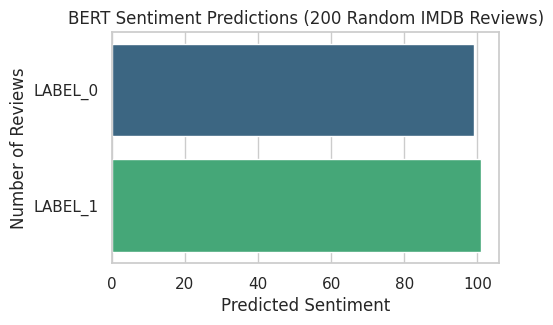

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on a larger sample for visualization
viz_sample = [text[:512] for text in random.sample(test_texts, 200)]
viz_preds = sentiment_model(viz_sample)
labels = [pred['label'] for pred in viz_preds]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,3))
sns.countplot(labels, palette='viridis')
plt.title('BERT Sentiment Predictions (200 Random IMDB Reviews)')
plt.ylabel('Number of Reviews')
plt.xlabel('Predicted Sentiment')
plt.show()


In [7]:
def check_sentiment(text):
    pred = sentiment_model(text[:512])[0]
    print(f"[bold blue]Text:[/bold blue] {text}")
    print(f"[bold yellow]Prediction:[/bold yellow] {pred['label']} | [bold cyan]Score:[/bold cyan] {pred['score']:.2f}")

# Try your own review!
check_sentiment("The direction and acting were truly inspiring!")
check_sentiment("I wouldn't recommend this movie to anyone.")


Text: The direction and acting were truly inspiring!

Prediction: LABEL_1 | Score: 1.00

Text: I wouldn't recommend this movie to anyone.

Prediction: LABEL_0 | Score: 1.00